In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel("data.xlsx")
df = pd.DataFrame(df)
df

,Employee_ID,Monthly_Expense
0,1,295
1,2,310
2,3,320
3,4,305
4,5,315
5,6,290
6,7,300
7,8,310
8,9,325
9,10,295


In [9]:
#Use descriptive statistics (mean, median, standard deviation, etc.) to understand the data distribution.
mean = df["Monthly_Expense"].mean()
median = df["Monthly_Expense"].median()
std = round(df["Monthly_Expense"].std(),2)
print("The mean:",mean)
print("The median:",median)
print("The standard deviation:",std)

#Z-score method 
df['Z_score'] = (df['Monthly_Expense'] - mean) / std

z_outliers = df[np.abs(df['Z_score']) > 3]

print("Z-score outliers:")
print(z_outliers)

The mean: 329.5
The median: 310.0
The standard deviation: 113.47
Z-score outliers:
    Employee_ID  Monthly_Expense   Z_score
27           28              700  3.265180
28           29              750  3.705825


In [10]:
#IQR method
Q1 = df['Monthly_Expense'].quantile(0.25)
Q3 = df['Monthly_Expense'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df[(df['Monthly_Expense'] < lower_bound) | (df['Monthly_Expense'] > upper_bound)]

print("IQR outliers:")
print(iqr_outliers)

IQR outliers:
    Employee_ID  Monthly_Expense   Z_score
26           27              120 -1.846303
27           28              700  3.265180
28           29              750  3.705825


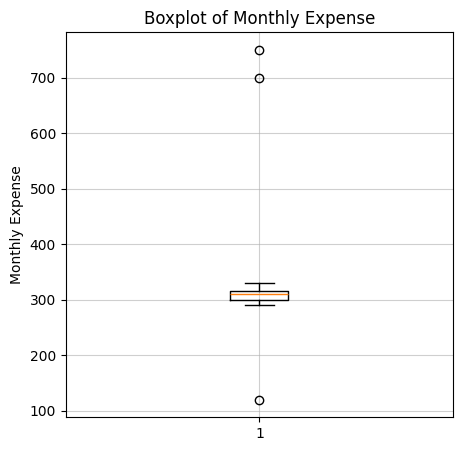

In [11]:
#boxplot
plt.figure(figsize=(5,5))
plt.boxplot(df['Monthly_Expense'], vert=True)
plt.title("Boxplot of Monthly Expense")
plt.ylabel("Monthly Expense")
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

In [12]:
print(upper_bound)

337.5


In [13]:
lower_bound

np.float64(277.5)